In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import json

In [167]:
sns.set_context("talk")
sns.set_theme(style='white')
sns.set_style("whitegrid")
sns.set_palette('bright')

In [168]:
cosine_distance_df = pd.read_csv("MAIN_DISTANCE_MATRIX_AUTHORLESS_POS.csv")
cosine_distance_df.set_index(["novel_name"], inplace=True)

In [141]:
GENRES_GALLICA = pd.read_csv("GENRES_GALLICA_AVENTURES.csv")
GENRES_GALLICA.set_index(["index"], inplace=True)

In [142]:
GENRES_GALLICA.category.value_counts()

category
general     11585
aventure     2114
Name: count, dtype: int64

In [143]:
df = cosine_distance_df.copy()

In [144]:
#df_scaled = (df + 1) / 2 # values from [−1,1] range to [0,1].

# GET NOVEL REPARTITION THROUGH TIME

In [145]:
df['date'] = [elem.split('_')[0] for elem in df.index]
df['date'] = pd.to_numeric(df['date'], errors='coerce')

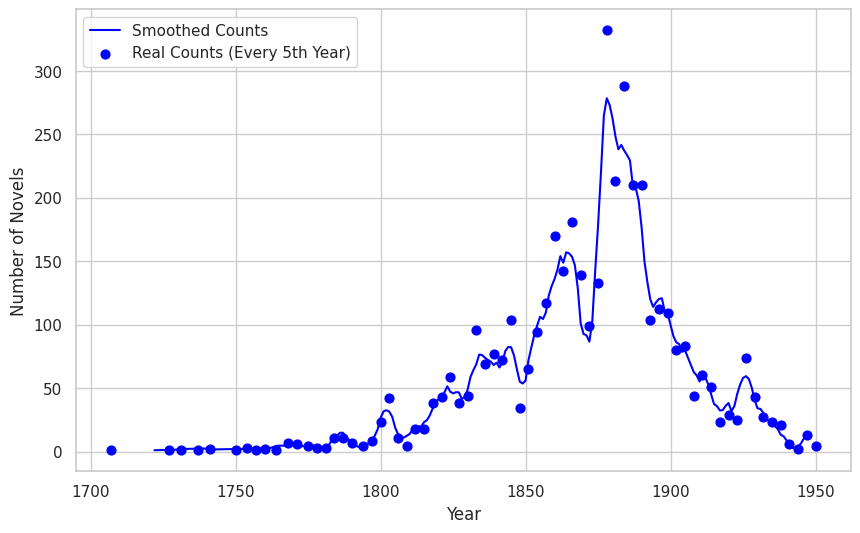

In [147]:
counts_per_date = df.groupby('date')['date'].count()  # Real counts

# Apply rolling mean for smoothing
rolling_window_size = 5
smoothed_counts = counts_per_date.rolling(window=rolling_window_size, center=True).mean()

# Plot the smoothed data using seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x=smoothed_counts.index, y=smoothed_counts, label='Smoothed Counts', color='blue')

# Add real data points (unsmoothed) for better visualization using scatter plot, every 5th point
plt.scatter(x=counts_per_date.index[::3], y=counts_per_date[::3], color='blue', s=40, label='Real Counts (Every 5th Year)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Novels')
#plt.title('Novel Counts per Year (Smoothed with Rolling Mean and Selected Real Data Points)')

# Save the plot
plt.savefig('img/NOVEL_COUNT_YEAR.png', format='png', bbox_inches='tight', dpi=400)

# Show the plot
plt.legend()
plt.show()


# SAMPLING

In [148]:
max_samples_per_year = 50  # Maximum number of novels to sample per year
min_samples_per_year = 25  # Minimum number of novels required for a year to be included

In [149]:
def stratified_sampling(group, max_samples, min_samples):
    n_samples = group.shape[0]  # Number of novels in the group (for that year)
    
    if n_samples >= max_samples:
        # Downsample if the year has more novels than the max limit
        return group.sample(n=max_samples)
    elif n_samples >= min_samples:
        # Keep the group as it is if it meets the minimum requirement
        return group
    else:
        # Optionally drop groups with too few novels, or you can implement smoothing here
        return None  # To drop years with too few examples


In [80]:
#df = df.astype('float32', errors='ignore') # try this if process get killed

In [81]:
# Apply the stratified sampling
sampled_df = df.groupby('date').apply(lambda x: stratified_sampling(x, max_samples_per_year, min_samples_per_year))#.dropna()

In [82]:
sampled_df = sampled_df.reset_index(drop=True)

In [83]:
grouped_sampled = sampled_df.groupby('date')

In [84]:
mean_cos_sim_sampled = grouped_sampled.mean()

In [85]:
# Create a new dataframe with the results
result_per_date_sampled = mean_cos_sim_sampled.T

In [18]:
result_per_date_sampled.to_csv("SIMILARITY_PER_YEAR_SAMPLED_25-50.csv", index=True, header=True) 

# REPRENDRE ICI

In [3]:
result_per_date_sampled = pd.read_csv("SIMILARITY_PER_YEAR_SAMPLED_25-50.csv")
result_per_date_sampled.set_index(["Unnamed: 0"], inplace=True)

In [4]:
result_per_date_sampled

,1801,1802,1803,1813,1817,1818,1819,1820,1821,1822,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1864_Clauet_Louis_Louis-dAppilly-(L.-Clauet).-L,0.396503,0.442470,0.428023,0.395697,0.440385,0.506809,0.469468,0.411792,0.393527,0.400028,...,0.555818,0.601515,0.675881,0.609118,0.773889,0.737104,0.667723,0.709084,0.724828,0.686483
1903_Dhanys_Marcel_Mésalliance,0.534309,0.528746,0.543516,0.553752,0.528945,0.509049,0.500913,0.538304,0.551600,0.530151,...,0.484148,0.469661,0.461776,0.459276,0.434192,0.448632,0.470112,0.437475,0.436646,0.428925
1848_Foa_Eugénie_Les-soirées-du-vieux-château,0.509116,0.510644,0.513118,0.556549,0.522585,0.503023,0.513585,0.532289,0.546030,0.543849,...,0.466427,0.443729,0.430720,0.431362,0.399812,0.414216,0.425708,0.398449,0.411461,0.405061
1882_Blavet_Émile_Matout,0.540915,0.509985,0.519831,0.554235,0.540312,0.523961,0.522252,0.540528,0.557937,0.582263,...,0.467018,0.447718,0.437223,0.449910,0.401933,0.411511,0.432785,0.409762,0.402487,0.422930
1886_Montépin_Xavier-de_La-voyante,0.556179,0.518391,0.517191,0.527345,0.523296,0.480931,0.508749,0.538723,0.552379,0.545180,...,0.474458,0.445930,0.417596,0.455324,0.374606,0.388685,0.414103,0.402790,0.395817,0.423828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935_Trombert_Georges_Un-crime-au-palais-dhiver,0.392073,0.436940,0.425975,0.403675,0.430487,0.500624,0.466765,0.401928,0.392032,0.405978,...,0.555945,0.586267,0.653766,0.608494,0.745560,0.714629,0.655232,0.699960,0.700201,0.666063
1808_Miremont_Anne-dAub_Mémoires-de-Madame-la-marquise,0.666472,0.634567,0.655339,0.673469,0.628465,0.585053,0.574076,0.642895,0.658577,0.619908,...,0.445766,0.431060,0.400901,0.404769,0.349496,0.378172,0.402285,0.358161,0.369610,0.364074
1900_Allais_Alphonse_Ne-nous-frappons-pas,0.589006,0.562929,0.588741,0.537123,0.552163,0.504056,0.510703,0.551066,0.564187,0.512947,...,0.489446,0.474508,0.428095,0.490849,0.398373,0.412333,0.448171,0.430630,0.409692,0.443287


In [86]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

In [87]:
columns_to_drop = [col for col in result_per_date_sampled.columns if int(col) < 1820]

In [88]:
result_per_date_sampled = result_per_date_sampled.drop(columns=columns_to_drop)

In [89]:
test = [elem for elem in list(result_per_date_sampled.index) if "proust" in elem.lower()]

In [90]:
test

['1919_Proust_Marcel_Du-côté-de-chez-Swann',
 '1914_Proust_Marcel_À-la-recherche-du-temps-perdu',
 '1918_Proust_Marcel_À-lombre-des-jeunes-filles-en',
 '1925_Proust_Marcel_Albertine-disparue',
 '1922_Proust_Marcel_Sodome-et-Gomorrhe',
 '1927_Proust_Marcel_Le-temps-retrouvé']

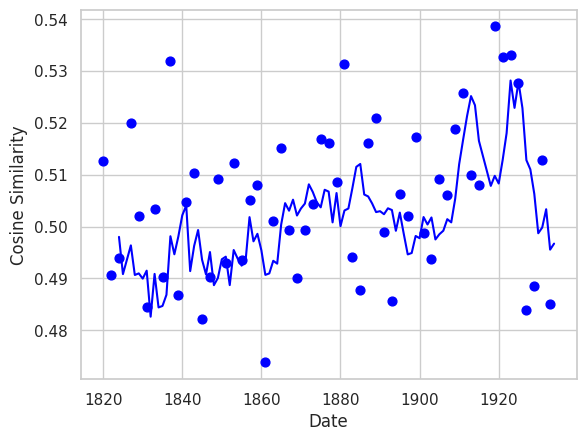

In [100]:
# Extract row values for a specific entry
row_values = result_per_date_sampled.loc['1927_Proust_Marcel_Le-temps-retrouvé']

# Set the moving average window size
window_size = 5

# Calculate the moving average for smoothing
smoothed_values = moving_average(row_values.values, window_size)

# Plot the smoothed values
plt.plot(row_values.index[window_size-1:], smoothed_values, color='blue')

# Overlay real data points (every 5th point) on the same plot
plt.scatter(row_values.index[::2], row_values.values[::2], color='blue', s=40)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Cosine Similarity')
#plt.title('Cosine Similarity with Moving Average and Selected Real Data Points')

# Save the plot
#plt.savefig('LAST_IMG/REYBAUD_MEZELIE.png', format='png', bbox_inches='tight', dpi=400)

# Show the plot with legend
plt.show()


In [102]:
def compute_fenetre(df, Y):
    rows, indexes = [], []
    df_main = pd.DataFrame(columns=range(-Y, Y+1))
    # For each row in the dataframe
    for index_courant in tqdm(list(df.index)):
        date_courante = int(index_courant.split("_")[0])
        
    # Select the Y rows before and after the current row
        if  (1800 + Y) < date_courante < (1950 - Y):  # Assuming the range is 1700-1950
            columns_fenetre = [col for col in df.columns if (int(col) >= date_courante - Y) and (int(col) <= date_courante + Y)]
            row_filtered = list(df.loc[index_courant, columns_fenetre]) 
            indexes.append(index_courant)
            rows.append(row_filtered)
            if len(row_filtered) != Y*2 +1:
                continue
            # Create a temporary DataFrame to append the new row
            temp_df = pd.DataFrame([row_filtered], index=[index_courant], columns=range(-Y, Y+1))
            # Append the row to the main DataFrame
            df_main = pd.concat([df_main, temp_df], axis=0)
            
    return df_main

In [150]:
max_samples_per_year = 50
min_samples_per_year = 25
num_draws = 10

# Step 1: Prepare the initial dataframe
df = cosine_distance_df.copy()
df['date'] = [elem.split('_')[0] for elem in df.index]  # Extract date from index
df['date'] = pd.to_numeric(df['date'], errors='coerce')  # Convert to numeric

# Initialize df_plot to store results of each draw
df_plot = pd.DataFrame()  

# Step 2: Loop through the number of draws
for draw in tqdm(range(1, num_draws + 1)):
    print(f"Processing draw {draw}...")

    # Step 3: Apply stratified sampling
    sampled_df = df.groupby('date').apply(
        lambda x: stratified_sampling(x, max_samples_per_year, min_samples_per_year)
    )
    sampled_df = sampled_df.reset_index(drop=True)

    # Step 4: Compute mean cosine similarity for the sampled data
    grouped_sampled = sampled_df.groupby('date')
    mean_cos_sim_sampled = grouped_sampled.mean()

    # Step 5: Compute result per date
    result_per_date_sampled = mean_cos_sim_sampled.T
    df_MAIN_ALL = compute_fenetre(result_per_date_sampled, 30)

    # Step 6: Compute the mean for each year and store in the list
    list_mean = [np.mean(df_MAIN_ALL[col]) for col in df_MAIN_ALL.columns]

    # Step 7: Add the result of the current draw to df_plot
    df_plot[f'draw{draw}'] = list_mean

# Now df_plot contains the mean results for each draw


  0%|          | 0/10 [00:00<?, ?it/s]

Processing draw 1...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 2...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 3...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 4...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 5...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 6...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 7...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 8...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 9...


  0%|          | 0/12177 [00:00<?, ?it/s]

Processing draw 10...


  0%|          | 0/12177 [00:00<?, ?it/s]

In [97]:
df_plot

,draw1,draw2,draw3,draw4,draw5,draw6,draw7,draw8,draw9,draw10
0,0.516975,0.517354,0.517690,0.517249,0.517612,0.517590,0.517610,0.517239,0.517667,0.516610
1,0.516683,0.516651,0.517639,0.517068,0.516643,0.517168,0.516885,0.516469,0.517324,0.516194
2,0.516653,0.516253,0.516992,0.516802,0.516128,0.516700,0.516320,0.515510,0.516875,0.515634
3,0.516243,0.516295,0.516588,0.516252,0.515224,0.516618,0.515268,0.514702,0.516012,0.515309
4,0.516028,0.516637,0.516280,0.516182,0.515299,0.516706,0.514761,0.514508,0.516076,0.515034
...,...,...,...,...,...,...,...,...,...,...
56,0.506516,0.505511,0.505538,0.506021,0.505568,0.507595,0.505634,0.506450,0.506016,0.505704
57,0.505297,0.504920,0.504204,0.505059,0.504488,0.506522,0.504286,0.504825,0.505188,0.504744
58,0.503686,0.502939,0.502862,0.503025,0.502325,0.504492,0.502887,0.503323,0.503202,0.502739
59,0.503077,0.502606,0.502384,0.502513,0.502307,0.503591,0.503037,0.502857,0.502900,0.502500


In [153]:
years_list = list(range(-30, 31))
df_plot["years"] = years_list

In [154]:
df_plot

,draw1,draw2,draw3,draw4,draw5,draw6,draw7,draw8,draw9,draw10,years
0,0.517366,0.516948,0.518177,0.516946,0.517012,0.517145,0.516285,0.516861,0.516380,0.517682,-30
1,0.517143,0.516414,0.517946,0.516548,0.517072,0.516515,0.515873,0.516409,0.516606,0.517225,-29
2,0.516903,0.516252,0.517259,0.516413,0.517160,0.516144,0.515554,0.516165,0.516621,0.516603,-28
3,0.516507,0.516012,0.517102,0.515897,0.516683,0.515694,0.515210,0.515944,0.516408,0.515923,-27
4,0.516505,0.516408,0.517334,0.515951,0.516836,0.515787,0.515251,0.515770,0.515687,0.515967,-26
...,...,...,...,...,...,...,...,...,...,...,...
56,0.506642,0.505594,0.505917,0.505513,0.506656,0.506200,0.507382,0.505361,0.506685,0.505864,26
57,0.505769,0.504419,0.505340,0.504531,0.505637,0.505398,0.506196,0.504476,0.505254,0.505088,27
58,0.503518,0.502922,0.503255,0.502782,0.503824,0.503698,0.504677,0.502960,0.503218,0.502987,28
59,0.502534,0.503159,0.502467,0.502237,0.503464,0.503477,0.504015,0.502410,0.502757,0.503457,29


In [155]:
df_plot_reset = df_plot.reset_index(drop=True)  # keep the 'years' column but drop index
df_melted = df_plot_reset.melt(id_vars='years', var_name='draw', value_name='Cosine Similarity')

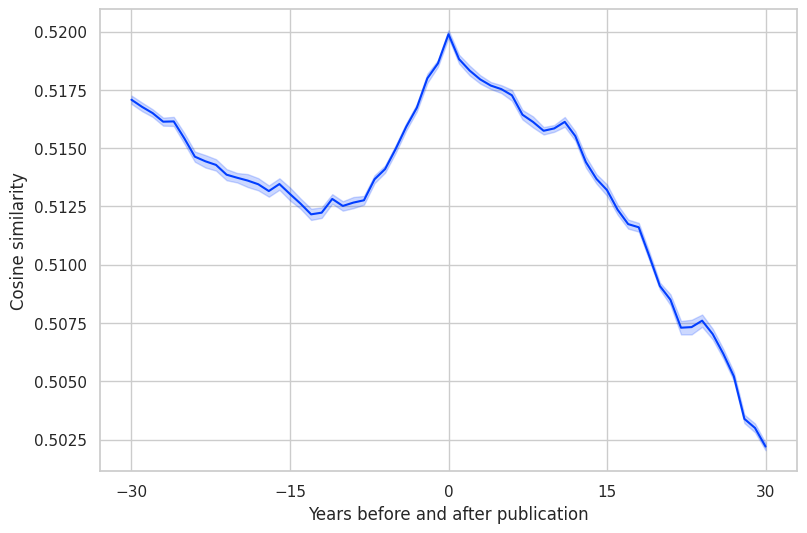

In [159]:
plt.figure(figsize=(9,6))
sns.lineplot(data=df_melted, x='years', y='Cosine Similarity', errorbar='se')

# Customize plot
plt.xlabel('Years before and after publication')
plt.ylabel('Cosine similarity')
plt.xticks([-30, -15, 0, 15, 30])
plt.savefig('LAST_IMG/PIC_30_ANS_CONFIDENCE_SE.png', format='png', bbox_inches='tight', dpi=400)

plt.show()

# CANON ARCHIVE ISSUES

In [173]:
with open('index_GALLICA_canon.json', 'r') as f:
    # Load the JSON data into a Python object
    data_canon = json.load(f)

In [174]:
canon_dict = {v['novel_name']: v['canon_author'] for k, v in data_canon.items()}

In [176]:
cosine_distance_df['canon'] = cosine_distance_df.index.map(canon_dict)

In [178]:
cosine_distance_df['canon'] = cosine_distance_df['canon'].replace({True: 'canon', False: 'non_canon'})

In [179]:
cosine_distance_df.canon.value_counts()

canon
non_canon    11202
canon         1083
Name: count, dtype: int64

In [72]:
df_MAIN_ALL['canon'] = df_MAIN_ALL.index.map(canon_dict)

In [73]:
df_MAIN_ALL

,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,...,22,23,24,25,26,27,28,29,30,canon
1864_Clauet_Louis_Louis-dAppilly-(L.-Clauet).-L,0.405413,0.428461,0.414107,0.372292,0.420230,0.406853,0.405477,0.394251,0.405378,0.411000,...,0.456637,0.374473,0.427505,0.378542,0.385231,0.393770,0.436006,0.412630,0.416869,False
1882_Blavet_Émile_Matout,0.528382,0.530337,0.549575,0.526280,0.529889,0.539206,0.524008,0.506591,0.517304,0.501403,...,0.484687,0.477869,0.502163,0.481169,0.485972,0.484301,0.505389,0.468278,0.474558,False
1880_Rouquette_Jules_Lespionne-du-grand-monde,0.557334,0.548898,0.543035,0.545045,0.556151,0.533634,0.512820,0.545930,0.525360,0.504212,...,0.539158,0.565144,0.486975,0.489005,0.521384,0.513121,0.514317,0.515688,0.531601,False
1878_Pieyre_Adolphe_Débora-la-bohémienne,0.525948,0.506646,0.520096,0.528588,0.521033,0.530758,0.512595,0.509727,0.502584,0.524813,...,0.521391,0.501091,0.520414,0.519481,0.494724,0.491798,0.499649,0.528102,0.506289,False
1885_Beugny-dH_Gabriel-de_Yvonne-de-Montigneul,0.534774,0.529182,0.537625,0.522657,0.507246,0.531178,0.508199,0.531159,0.508830,0.506264,...,0.482953,0.484278,0.480529,0.484388,0.483757,0.478223,0.475290,0.475980,0.474291,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862_Luchet_Auguste_Thadéus-le-ressuscité,0.540450,0.572535,0.556047,0.538879,0.552535,0.556842,0.552693,0.562518,0.556783,0.571235,...,0.544721,0.561832,0.518869,0.554773,0.537666,0.544539,0.557022,0.541967,0.516440,False
1880_Zaccone_Pierre_Les-compagnons-noirs,0.527549,0.530396,0.520481,0.527116,0.515772,0.511325,0.504368,0.516876,0.516567,0.495161,...,0.520807,0.527993,0.481323,0.494957,0.501791,0.501787,0.503287,0.501227,0.510233,False
1874_none_none_Le-roman-des-femmes-qui-ont-ai,0.521210,0.493258,0.524644,0.524518,0.530155,0.552061,0.539307,0.533953,0.513944,0.541720,...,0.496421,0.524970,0.498446,0.484643,0.480963,0.485884,0.489740,0.496438,0.470967,False
1876_Zaccone_Pierre_Les-nuits-du-boulevard,0.550225,0.534984,0.547922,0.515598,0.542388,0.533376,0.536396,0.541071,0.539637,0.531067,...,0.492546,0.523907,0.502615,0.501582,0.536590,0.545786,0.483047,0.489518,0.512807,False


In [105]:
df_MAIN_ALL['canon'] = df_MAIN_ALL['canon'].replace({True: 'canon', False: 'non_canon'})

In [106]:
df_MAIN_ALL.canon.value_counts()

canon
non_canon    4606
canon         363
Name: count, dtype: int64

In [107]:
df_MAIN_canon = df_MAIN_ALL[df_MAIN_ALL["canon"]=="canon"]
df_MAIN_noncanon = df_MAIN_ALL[df_MAIN_ALL["canon"]=="non_canon"]

In [108]:
df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)

/tmp/ipykernel_893906/3115948931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_893906/3115948931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)


In [117]:
df_MAIN_noncanon = df_MAIN_noncanon.sample(n=len(df_MAIN_canon))

In [118]:
list_mean_canon = []
for col in df_MAIN_canon.columns:
    list_mean_canon.append(np.mean(df_MAIN_canon[col]))

In [119]:
list_mean_noncanon = []
for col in df_MAIN_noncanon.columns:
    list_mean_noncanon.append(np.mean(df_MAIN_noncanon[col]))

In [120]:
df_plot_canon = pd.DataFrame({'years': list(df_MAIN_canon.columns), 'means_canon': list_mean_canon, 'canon': ["canon" for elem in range(len(list_mean_canon))]})

In [121]:
df_plot_noncanon = pd.DataFrame({'years': list(df_MAIN_noncanon.columns), 'means_canon': list_mean_noncanon, 'canon': ["non_canon" for elem in range(len(list_mean_noncanon))]})

In [122]:
df_PLOT_CANON = pd.concat([df_plot_canon, df_plot_noncanon], axis=0)

In [123]:
df_PLOT_CANON

,years,means_canon,canon
0,-30,0.516305,canon
1,-29,0.515955,canon
2,-28,0.516435,canon
3,-27,0.516969,canon
4,-26,0.518792,canon
...,...,...,...
56,26,0.503920,non_canon
57,27,0.502587,non_canon
58,28,0.500854,non_canon
59,29,0.499803,non_canon


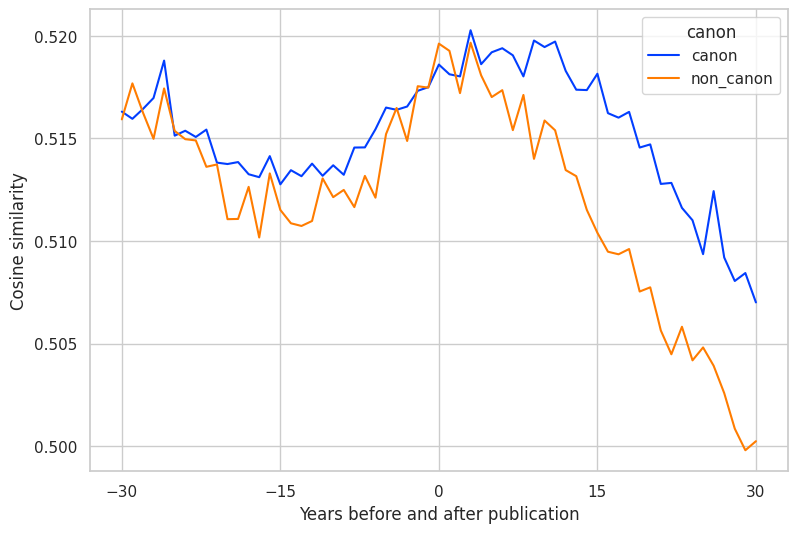

In [289]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
#ax.set_title('Entropy')

ax = sns.lineplot(data=df_PLOT_CANON, x="years", y="means_canon", hue="canon")

ax.set_xlabel('Years before and after publication')
ax.set_ylabel('Cosine similarity')

xtick_values = [-30, -15, 0, 15, 30]
plt.xticks(xtick_values)
plt.savefig('img/PIC_30_ANS_CANON_ARCHIVE_SAMPLED.png', format='png', bbox_inches='tight', dpi=400)
plt.show()


# GENRES ISSUES

In [116]:
GENRES_GALLICA.value_counts()

category
general     11585
aventure     2114
Name: count, dtype: int64

In [161]:
df_MAIN_ALL['genres'] = df_MAIN_ALL.index.map(GENRES_GALLICA.category)

In [192]:
df_MAIN_genre = df_MAIN_ALL[df_MAIN_ALL["genres"]=="aventure"]
df_MAIN_other = df_MAIN_ALL[df_MAIN_ALL["genres"]=="general"]

In [193]:
df_MAIN_genre.drop(["canon", "genres"], axis=1, inplace=True)
df_MAIN_other.drop(["canon", "genres"], axis=1, inplace=True)

/tmp/ipykernel_893906/2885739358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["canon", "genres"], axis=1, inplace=True)
/tmp/ipykernel_893906/2885739358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["canon", "genres"], axis=1, inplace=True)


In [194]:
df_MAIN_other = df_MAIN_other.sample(n=len(df_MAIN_genre))

In [195]:
list_mean_genre = []
for col in df_MAIN_genre.columns:
    list_mean_genre.append(np.mean(df_MAIN_genre[col]))

In [196]:
list_mean_other = []
for col in df_MAIN_other.columns:
    list_mean_other.append(np.mean(df_MAIN_other[col]))

In [197]:
df_plot_genre = pd.DataFrame({'years': list(df_MAIN_genre.columns), 'means_genre': list_mean_genre, 'genre': ["aventure" for elem in range(len(list_mean_genre))]})

In [198]:
df_plot_other = pd.DataFrame({'years': list(df_MAIN_other.columns), 'means_genre': list_mean_other, 'genre': ["other" for elem in range(len(list_mean_other))]})

In [199]:
df_PLOT_GENRE = pd.concat([df_plot_genre, df_plot_other], axis=0)

In [200]:
df_PLOT_GENRE

,years,means_genre,genre
0,-30,0.517852,aventure
1,-29,0.516684,aventure
2,-28,0.517170,aventure
3,-27,0.517123,aventure
4,-26,0.517844,aventure
...,...,...,...
56,26,0.506901,other
57,27,0.505001,other
58,28,0.502473,other
59,29,0.502239,other


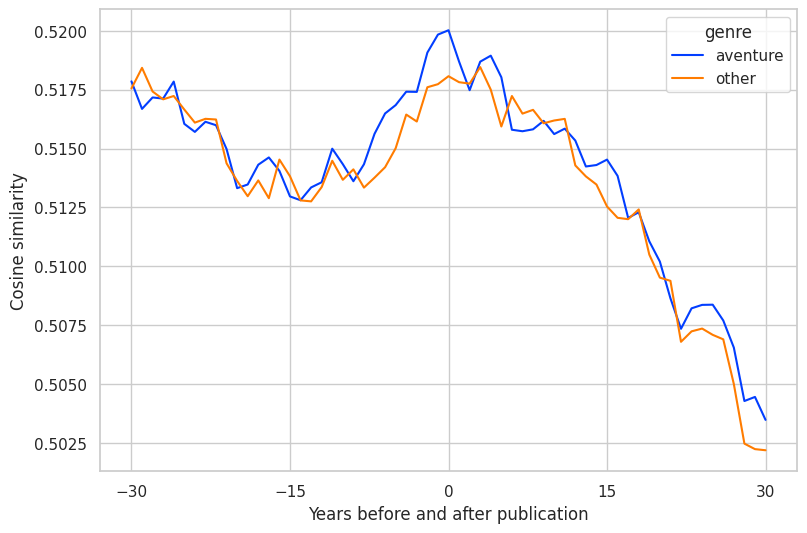

In [285]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
#ax.set_title('Entropy')

ax = sns.lineplot(data=df_PLOT_GENRE, x="years", y="means_genre", hue="genre")

ax.set_xlabel('Years before and after publication')
ax.set_ylabel('Cosine similarity')

xtick_values = [-30, -15, 0, 15, 30]
plt.xticks(xtick_values)
plt.savefig('img/PIC_30_ANS_AVENTURES.png', format='png', bbox_inches='tight', dpi=400)
plt.show()


# GET CONFIDENCE AREA

## CANON

In [128]:
max_samples_per_year = 50
min_samples_per_year = 25
num_draws = 10

# Step 1: Prepare the initial dataframe
df = cosine_distance_df.copy()
df['date'] = [elem.split('_')[0] for elem in df.index]  # Extract date from index
df['date'] = pd.to_numeric(df['date'], errors='coerce')  # Convert to numeric

# Initialize df_plot to store results of each draw
df_plot_canon = pd.DataFrame()  
df_plot_noncanon = pd.DataFrame()  

# Step 2: Loop through the number of draws
for draw in tqdm(range(1, num_draws + 1)):
    print(f"Processing draw {draw}...")

    # Step 3: Apply stratified sampling
    sampled_df = df.groupby('date').apply(
        lambda x: stratified_sampling(x, max_samples_per_year, min_samples_per_year)
    )
    sampled_df = sampled_df.reset_index(drop=True)

    # Step 4: Compute mean cosine similarity for the sampled data
    grouped_sampled = sampled_df.groupby('date')
    mean_cos_sim_sampled = grouped_sampled.mean()

    # Step 5: Compute result per date
    result_per_date_sampled = mean_cos_sim_sampled.T
    df_MAIN_ALL = compute_fenetre(result_per_date_sampled, 30)


    df_MAIN_ALL['canon'] = df_MAIN_ALL.index.map(canon_dict)
    df_MAIN_ALL['canon'] = df_MAIN_ALL['canon'].replace({True: 'canon', False: 'non_canon'})
    df_MAIN_canon = df_MAIN_ALL[df_MAIN_ALL["canon"]=="canon"]
    df_MAIN_noncanon = df_MAIN_ALL[df_MAIN_ALL["canon"]=="non_canon"]
    df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
    df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)

    df_MAIN_noncanon = sample_decades(df_MAIN_canon, df_MAIN_noncanon)
    #df_MAIN_noncanon = df_MAIN_noncanon.sample(n=len(df_MAIN_canon))

    list_mean_canon = [np.mean(df_MAIN_canon[col]) for col in df_MAIN_canon.columns]
    list_mean_noncanon = [np.mean(df_MAIN_noncanon[col]) for col in df_MAIN_noncanon.columns]

    # Step 7: Add the result of the current draw to df_plot
    df_plot_canon[f'draw{draw}'] = list_mean_canon
    df_plot_noncanon[f'draw{draw}'] = list_mean_noncanon

  0%|          | 0/10 [00:00<?, ?it/s]

Processing draw 1...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 2...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 3...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 4...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 5...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 6...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 7...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 8...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 9...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

Processing draw 10...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/2592527444.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/2592527444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_noncanon.drop(["canon"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date

In [129]:
canon_list = ["canon" for _ in range(61)]
df_plot_canon["canon"] = canon_list

In [130]:
canon_list = ["non-canon" for _ in range(61)]
df_plot_noncanon["canon"] = canon_list

In [131]:
df_PLOT = pd.concat([df_plot_canon, df_plot_noncanon], axis=0)

In [132]:
years_list = list(range(-30, 31))+list(range(-30, 31))
df_PLOT["years"] = years_list

In [133]:
df_plot_reset = df_PLOT.reset_index(drop=True)  # keep the 'years' column but drop index
df_melted = df_plot_reset.melt(id_vars=['years', 'canon'], var_name='draw', value_name='Cosine Similarity')

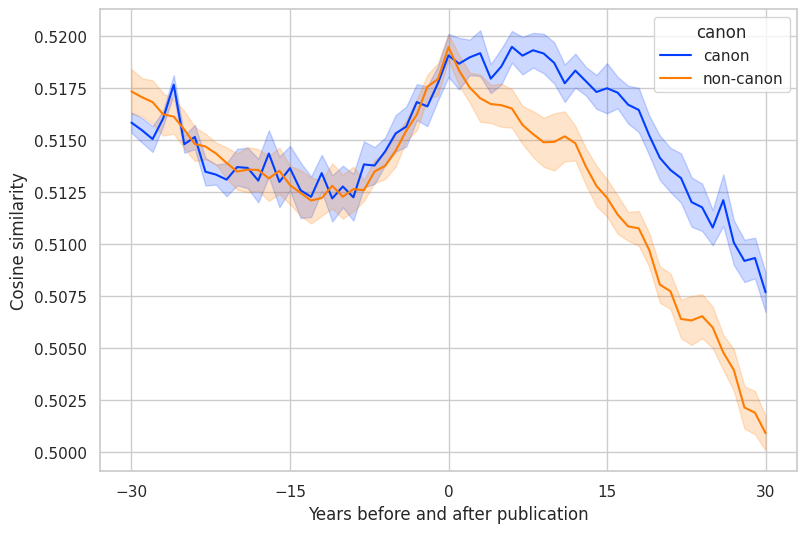

In [137]:
plt.figure(figsize=(9,6))
sns.lineplot(data=df_melted, x='years', y='Cosine Similarity', hue="canon", errorbar='sd')

# Customize plot
plt.xlabel('Years before and after publication')
plt.ylabel('Cosine similarity')
plt.xticks([-30, -15, 0, 15, 30])
plt.savefig('LAST_IMG/PIC_30_ANS_CANON_CONFIDENCE_SAMPLED_DECADES_SD.png', format='png', bbox_inches='tight', dpi=400)

plt.show()

## GENRE

In [115]:
max_samples_per_year = 50
min_samples_per_year = 25
num_draws = 10

# Step 1: Prepare the initial dataframe
df = cosine_distance_df.copy()
df['date'] = [elem.split('_')[0] for elem in df.index]  # Extract date from index
df['date'] = pd.to_numeric(df['date'], errors='coerce')  # Convert to numeric

# Initialize df_plot to store results of each draw
df_plot_genre = pd.DataFrame()  
df_plot_other = pd.DataFrame()  

# Step 2: Loop through the number of draws
for draw in tqdm(range(1, num_draws + 1)):
    print(f"Processing draw {draw}...")

    # Step 3: Apply stratified sampling
    sampled_df = df.groupby('date').apply(
        lambda x: stratified_sampling(x, max_samples_per_year, min_samples_per_year)
    )
    sampled_df = sampled_df.reset_index(drop=True)

    # Step 4: Compute mean cosine similarity for the sampled data
    grouped_sampled = sampled_df.groupby('date')
    mean_cos_sim_sampled = grouped_sampled.mean()

    # Step 5: Compute result per date
    result_per_date_sampled = mean_cos_sim_sampled.T
    df_MAIN_ALL = compute_fenetre(result_per_date_sampled, 30)


    df_MAIN_ALL['genres'] = df_MAIN_ALL.index.map(GENRES_GALLICA.category)
    df_MAIN_genre = df_MAIN_ALL[df_MAIN_ALL["genres"]=="aventure"]
    df_MAIN_other = df_MAIN_ALL[df_MAIN_ALL["genres"]=="general"]
    df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
    df_MAIN_other.drop(["genres"], axis=1, inplace=True)

    df_MAIN_other = sample_decades(df_MAIN_genre, df_MAIN_other)
    #df_MAIN_other = df_MAIN_other.sample(n=len(df_MAIN_genre))

    list_mean_genre = [np.mean(df_MAIN_genre[col]) for col in df_MAIN_genre.columns]
    list_mean_other = [np.mean(df_MAIN_other[col]) for col in df_MAIN_other.columns]

    # Step 7: Add the result of the current draw to df_plot
    df_plot_genre[f'draw{draw}'] = list_mean_genre
    df_plot_other[f'draw{draw}'] = list_mean_other

  0%|          | 0/10 [00:00<?, ?it/s]

Processing draw 1...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 2...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 3...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 4...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 5...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 6...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 7...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 8...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 9...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

Processing draw 10...


  0%|          | 0/12177 [00:00<?, ?it/s]

/tmp/ipykernel_987487/3747964204.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_genre.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/3747964204.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_other.drop(["genres"], axis=1, inplace=True)
/tmp/ipykernel_987487/862413340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MAIN_canon['date'

In [116]:
#df_plot_genre = df_plot_genre.drop(index=[60, 61])

In [117]:
genre_list = ["adventure" for _ in range(61)]
df_plot_genre["genre"] = genre_list

In [118]:
genre_list = ["general" for _ in range(61)]
df_plot_other["genre"] = genre_list

In [119]:
# Now df_plot contains the mean results for each draw
df_PLOT = pd.concat([df_plot_genre, df_plot_other], axis=0)

In [120]:
years_list = list(range(-30, 31))+list(range(-30, 31))
df_PLOT["years"] = years_list

In [121]:
df_plot_reset = df_PLOT.reset_index(drop=True)  # keep the 'years' column but drop index
df_melted = df_plot_reset.melt(id_vars=['years', 'genre'], var_name='draw', value_name='Cosine Similarity')

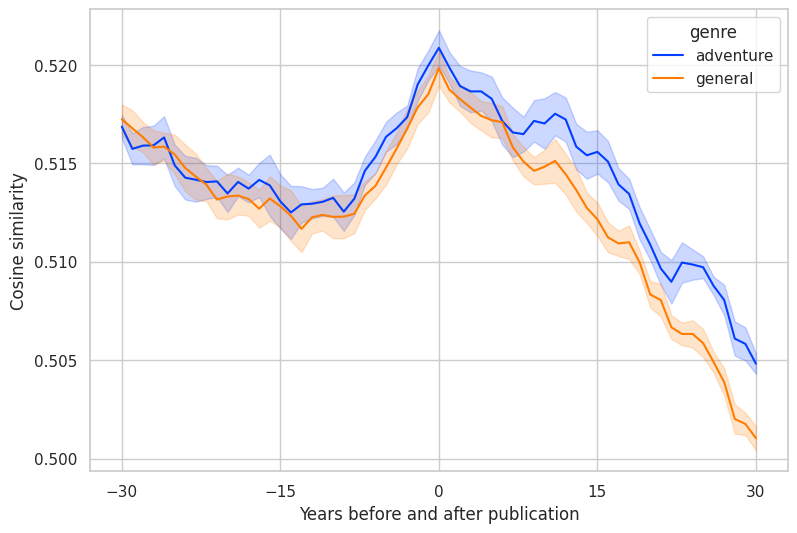

In [124]:
plt.figure(figsize=(9,6))
sns.lineplot(data=df_melted, x='years', y='Cosine Similarity', hue="genre", errorbar='sd')

# Customize plot
plt.xlabel('Years before and after publication')
plt.ylabel('Cosine similarity')

plt.xticks([-30, -15, 0, 15, 30])
plt.savefig('LAST_IMG/PIC_30_ANS_AVENTURES_CONFIDENCE_SAMPLED_DECADES_SD.png', format='png', bbox_inches='tight', dpi=400)

plt.show()

# STRATIFIED DRAWS

In [104]:
def sample_decades(df_MAIN_canon, df_MAIN_noncanon):
    # Add 'date' column to both dataframes
    df_MAIN_canon['date'] = [int(elem.split('_')[0]) for elem in df_MAIN_canon.index]
    df_MAIN_noncanon['date'] = [int(elem.split('_')[0]) for elem in df_MAIN_noncanon.index]

    # Add 'decade' column to both dataframes
    df_MAIN_canon['decade'] = (df_MAIN_canon['date'] // 10) * 10
    df_MAIN_noncanon['decade'] = (df_MAIN_noncanon['date'] // 10) * 10

    # Calculate the proportion of each decade in df_MAIN_canon
    decade_proportions = df_MAIN_canon['decade'].value_counts(normalize=True)
    #print("Decade distribution in df_MAIN_canon:")
    #print(decade_proportions)

    # Sample df_MAIN_noncanon to have approximately the same decade distribution
    df_sampled = pd.DataFrame()
    for decade, proportion in decade_proportions.items():
        # Calculate the number of samples to take from this decade
        n_samples = int(np.round(proportion * len(df_MAIN_noncanon)))

        # Sample from this decade
        df_decade = df_MAIN_noncanon[df_MAIN_noncanon['decade'] == decade]
        df_sampled_decade = df_decade.sample(n=n_samples, replace=True)

        # Add the sampled rows to the final dataframe
        df_sampled = pd.concat([df_sampled, df_sampled_decade])

    # Calculate the proportion of each decade in df_sampled
    sampled_decade_proportions = df_sampled['decade'].value_counts(normalize=True)
    #print("\nDecade distribution in df_sampled:")
    #print(sampled_decade_proportions)

    # Drop 'date' and 'decade' columns from df_sampled
    df_sampled = df_sampled.drop(columns=['date', 'decade'])
    df_MAIN_canon.drop(columns=['date', 'decade'], inplace=True)
    return df_sampled

In [197]:
sampled_df = sample_decades(df_MAIN_canon, df_MAIN_noncanon)